In [1]:
# Import Package
import os
import pandas as pd
import numpy as np
import re
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\B I M A\AppData\Local\Temp\ipykernel_10708\2475435253.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
twitter = pd.read_csv('C:/Users/B I M A/Downloads/quis visualisasi/data.csv',encoding='Latin-1')

In [4]:
twitter

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [6]:
twitter.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
twitter.shape

(13169, 13)

In [8]:
twitter.isnull()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,False,False,False,False,False,False,False,False,False,False,False,False,False
13165,False,False,False,False,False,False,False,False,False,False,False,False,False
13166,False,False,False,False,False,False,False,False,False,False,False,False,False
13167,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
twitter.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [10]:
twitter.dropna

<bound method DataFrame.dropna of                                                    Tweet  HS  Abusive  \
0      - disaat semua cowok berusaha melacak perhatia...   1        1   
1      RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2      41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3      USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4      USER USER Kaum cebong kapir udah keliatan dong...   1        1   
...                                                  ...  ..      ...   
13164  USER jangan asal ngomong ndasmu. congor lu yg ...   1        1   
13165                       USER Kasur mana enak kunyuk'   0        1   
13166  USER Hati hati bisu :( .g\n\nlagi bosan huft \...   0        0   
13167  USER USER USER USER Bom yang real mudah terdet...   0        0   
13168  USER Mana situ ngasih(": itu cuma foto ya kuti...   1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0        

In [11]:
twitterr = twitter.drop_duplicates()

In [12]:
twitterr

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
twitterr.columns

Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong'],
      dtype='object')

In [14]:
twitterr.rename(columns={
        'HS_Individual': 'Personal', 
        'HS_Group': 'Group',
        'HS_Religion': 'Religion',
        'HS_Race': 'Rasis',
        'HS_Physical': 'Fisik',
        'HS_Gender': 'Gender',
        'HS_Moderate': 'Sedang',
        'HS_Weak': 'Weak',
        'HS_Strong': 'Strong',
        'HS_Other': 'Other'
    }, inplace=True)

C:\Users\B I M A\AppData\Local\Temp\ipykernel_10708\726501681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitterr.rename(columns={


In [15]:
twitterr

,Tweet,HS,Abusive,Personal,Group,Religion,Rasis,Fisik,Gender,Other,Weak,Sedang,Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
twitterr.isnull().sum()

Tweet       0
HS          0
Abusive     0
Personal    0
Group       0
Religion    0
Rasis       0
Fisik       0
Gender      0
Other       0
Weak        0
Sedang      0
Strong      0
dtype: int64

In [17]:
def clean_twitter(twitterr):
    twitterr = re.sub('http\S+', '', twitterr)
    twitterr = re.sub(r'[^a-zA-Z0-9]', ' ', twitterr)
    twitterr = re.sub('\s+', ' ', twitterr)
    twitterr = twitterr.strip()
    twitterr = twitterr.lower()

    return twitterr

In [18]:
clean_twitter

<function __main__.clean_twitter(twitterr)>

In [19]:
twitterr['FIX']= twitterr['Tweet'].apply(clean_twitter)

C:\Users\B I M A\AppData\Local\Temp\ipykernel_10708\697910796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitterr['FIX']= twitterr['Tweet'].apply(clean_twitter)


In [20]:
twitterr

,Tweet,HS,Abusive,Personal,Group,Religion,Rasis,Fisik,Gender,Other,Weak,Sedang,Strong,FIX
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,rt user user siapa yang telat ngasih tau elu e...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,41 kadang aku berfikir kenapa aku tetap percay...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,user user aku itu aku n nku tau matamu sipit t...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,user user kaum cebong kapir udah keliatan dong...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,user jangan asal ngomong ndasmu congor lu yg s...
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,user kasur mana enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,user hati hati bisu g n nlagi bosan huft xf0 x...
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,user user user user bom yang real mudah terdet...


In [21]:
twitterr["FIX"] = twitterr["FIX"].str.replace('user', " ")
twitterr["FIX"] = twitterr["FIX"].str.replace('rt', " ")
twitterr["FIX"] = twitterr["FIX"].str.replace('41', " ")
twitterr["FIX"] = twitterr["FIX"].str.replace('user', " ")
twitterr["FIX"] = twitterr["FIX"].str.replace('xf0', " ")
twitterr["FIX"] = twitterr["FIX"].str.replace('x98', " ")
twitterr["FIX"] = twitterr["FIX"].str.replace('x9f', " ")


C:\Users\B I M A\AppData\Local\Temp\ipykernel_10708\2875430628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitterr["FIX"] = twitterr["FIX"].str.replace('user', " ")
C:\Users\B I M A\AppData\Local\Temp\ipykernel_10708\2875430628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitterr["FIX"] = twitterr["FIX"].str.replace('rt', " ")
C:\Users\B I M A\AppData\Local\Temp\ipykernel_10708\2875430628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [22]:
twitterr.drop(columns= "Tweet")

,HS,Abusive,Personal,Group,Religion,Rasis,Fisik,Gender,Other,Weak,Sedang,Strong,FIX
0,1,1,1,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian ...
1,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat ngasih tau elu edan sar...
2,0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berfikir kenapa aku tetap percaya...
3,0,0,0,0,0,0,0,0,0,0,0,0,aku itu aku n nku tau matamu sipit tapi di...
4,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kapir udah keliatan dongoknya ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,1,1,1,0,0,0,1,0,0,1,0,0,jangan asal ngomong ndasmu congor lu yg seka...
13165,0,1,0,0,0,0,0,0,0,0,0,0,kasur mana enak kunyuk
13166,0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu g n nlagi bosan huft xaa
13167,0,0,0,0,0,0,0,0,0,0,0,0,bom yang real mudah terdeteksi bom yan...


In [23]:
twitterr.rename(columns={
        'FIX': 'Tweety', 
    }, inplace=True)

C:\Users\B I M A\AppData\Local\Temp\ipykernel_10708\3172760860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitterr.rename(columns={


In [24]:
twitterr

,Tweet,HS,Abusive,Personal,Group,Religion,Rasis,Fisik,Gender,Other,Weak,Sedang,Strong,Tweety
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat ngasih tau elu edan sar...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berfikir kenapa aku tetap percaya...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku itu aku n nku tau matamu sipit tapi di...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kapir udah keliatan dongoknya ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,jangan asal ngomong ndasmu congor lu yg seka...
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,kasur mana enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu g n nlagi bosan huft xaa
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,bom yang real mudah terdeteksi bom yan...


In [25]:
twitterr1 = twitterr.drop(columns= "Tweet")

In [26]:
twitterr1

,HS,Abusive,Personal,Group,Religion,Rasis,Fisik,Gender,Other,Weak,Sedang,Strong,Tweety
0,1,1,1,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian ...
1,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat ngasih tau elu edan sar...
2,0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berfikir kenapa aku tetap percaya...
3,0,0,0,0,0,0,0,0,0,0,0,0,aku itu aku n nku tau matamu sipit tapi di...
4,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kapir udah keliatan dongoknya ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,1,1,1,0,0,0,1,0,0,1,0,0,jangan asal ngomong ndasmu congor lu yg seka...
13165,0,1,0,0,0,0,0,0,0,0,0,0,kasur mana enak kunyuk
13166,0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu g n nlagi bosan huft xaa
13167,0,0,0,0,0,0,0,0,0,0,0,0,bom yang real mudah terdeteksi bom yan...


In [27]:
twitterr1["Tweety"] = twitterr1["Tweety"].str.replace('xe5', " ")
twitterr1["Tweety"] = twitterr1["Tweety"].str.replace('xbc', " ")
twitterr1["Tweety"] = twitterr1["Tweety"].str.replace('xa0', " ")
twitterr1["Tweety"] = twitterr1["Tweety"].str.replace('xe8', " ")
twitterr1["Tweety"] = twitterr1["Tweety"].str.replace('x89', " ")
twitterr1["Tweety"] = twitterr1["Tweety"].str.replace('xba', " ")
twitterr1["Tweety"] = twitterr1["Tweety"].str.replace('x85', " ")
twitterr1["Tweety"] = twitterr1["Tweety"].str.replace('xb4', " ")

In [28]:
twitterr1.describe()

,HS,Abusive,Personal,Group,Religion,Rasis,Fisik,Gender,Other,Weak,Sedang,Strong
count,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000
mean,0.423030,0.383701,0.271389,0.151641,0.060488,0.043162,0.024686,0.023306,0.284115,0.256670,0.130175,0.036185
std,0.494059,0.486305,0.444693,0.358686,0.238397,0.203229,0.155171,0.150879,0.451009,0.436812,0.336509,0.186758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Tweet yang Mengandung Hate Speech dan Kata Abusive

In [31]:
def Tweety(x):
    if x['HS'] == 1 and x['Abusive'] == 1:
        return 'Hate Speech & Abusive'
    elif x['HS'] == 1 and x['Abusive'] == 0:
        return 'Hate Speech'
    elif x['HS'] == 0 and x['Abusive'] == 1:
        return 'Abusive'
    else:
        return 'None'

twitterr1['Type'] = twitterr1.apply(Tweety, axis=1)

In [33]:
twitterr1.head(3)

,HS,Abusive,Personal,Group,Religion,Rasis,Fisik,Gender,Other,Weak,Sedang,Strong,Tweety,Type
0,1,1,1,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian ...,Hate Speech & Abusive
1,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat ngasih tau elu edan sar...,Abusive
2,0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berfikir kenapa aku tetap percaya...,None


In [35]:
twitterr1['Type'].value_counts()


Type
None                     5783
Hate Speech & Abusive    3262
Hate Speech              2256
Abusive                  1743
Name: count, dtype: int64

<Axes: ylabel='count'>

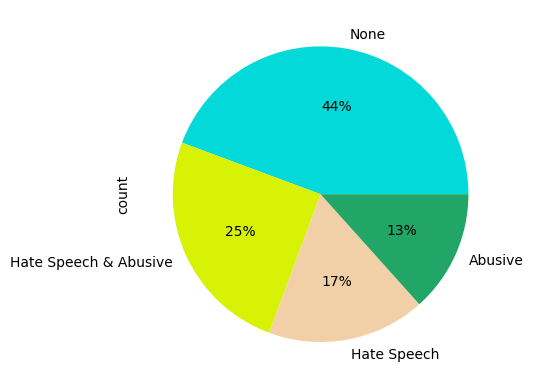

In [36]:
twitterr1['Type'].value_counts().plot.pie(autopct='%1.0f%%', colors = ['#04D9D9','#D7F205','#F2D0A7','#21A668'])

Sasaran Ujaran Kebencian

In [40]:
def Sasaran(x):
    if x['Personal'] == 1 and x['Group'] == 1:
        return 'Both'
    elif x['Personal'] == 1 and x['Group'] == 0:
        return 'Individual'
    elif x['Personal'] == 0 and x['Group'] == 1:
        return 'Group'
    else:
        return 'None'

twitterr1['Target'] = twitterr1.apply(Sasaran, axis=1)

In [41]:
twitterr1.head(3)


,HS,Abusive,Personal,Group,Religion,Rasis,Fisik,Gender,Other,Weak,Sedang,Strong,Tweety,Type,Target
0,1,1,1,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian ...,Hate Speech & Abusive,Individual
1,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat ngasih tau elu edan sar...,Abusive,None
2,0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berfikir kenapa aku tetap percaya...,None,None


In [42]:
filter = twitterr1['Target'] == 'None'
twitterr1[~filter]['Target'].value_counts()

Target
Individual    3540
Group         1978
Name: count, dtype: int64

<Axes: ylabel='count'>

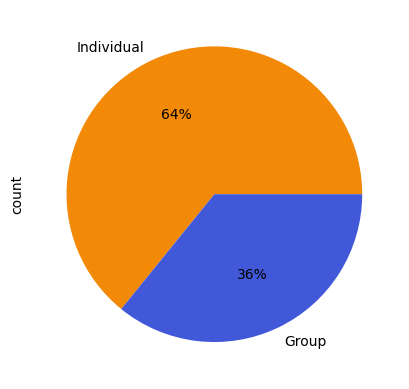

In [43]:
twitterr1[~filter]['Target'].value_counts().plot.pie(autopct='%1.0f%%', colors = ['#F28907','#4158D9'])

Mayoritas tweet yang mengandung ujaran kebencian ditujukan pada individu tertentu dengan rasio 64%.

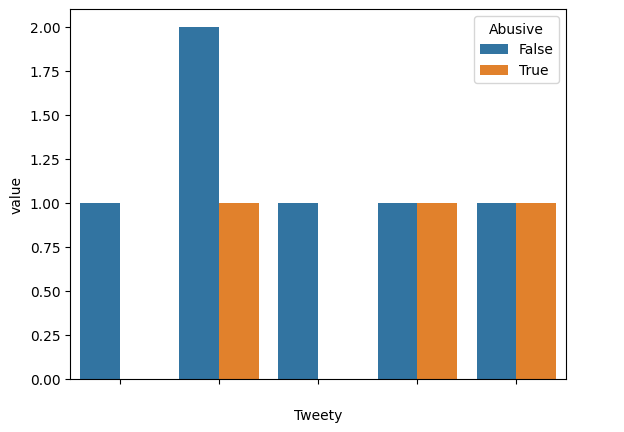

In [54]:
stacked = Head_Abusive_twitter.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.Tweety, y=stacked.value, hue=stacked.Abusive)
plt.show()

In [ ]:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

In [ ]:
K_Abusive = pd.read_csv('C:/Users/B I M A/Downloads/quis visualisasi/abusive.csv',encoding='Latin-1')

In [ ]:
K_Alay = pd.read_csv('C:/Users/B I M A/Downloads/quis visualisasi/new_kamusalay.csv',encoding='Latin-1')

In [78]:
twitter_set = twitterr1[['Tweety','HS', 'Other']]

In [79]:
twitter_set

,Tweety,HS,Other
0,disaat semua cowok berusaha melacak perhatian ...,1,1
1,siapa yang telat ngasih tau elu edan sar...,0,0
2,kadang aku berfikir kenapa aku tetap percaya...,0,0
3,aku itu aku n nku tau matamu sipit tapi di...,0,0
4,kaum cebong kapir udah keliatan dongoknya ...,1,0
...,...,...,...
13164,jangan asal ngomong ndasmu congor lu yg seka...,1,0
13165,kasur mana enak kunyuk,0,0
13166,hati hati bisu g n nlagi bosan huft xaa,0,0
13167,bom yang real mudah terdeteksi bom yan...,0,0


In [80]:
twitter_set11 = pd.crosstab(twitterr1['HS'], twitterr1['Tweety'])
print(twitter_set11)

Tweety                                         \
HS                                              
0                                           1   
1                                           0   

Tweety                                           \
HS                                                
0                                             2   
1                                             1   

Tweety                                             \
HS                                                  
0                                               1   
1                                               0   

Tweety                                               \
HS                                                    
0                                                 1   
1                                                 1   

Tweety                                                 \
HS                                                      
0                                                 

In [81]:
twitter_set11

Tweety,,,,,,,ngomong,p,am,itu minta nete sama elu,...,yg paling mirisnya mereka tuh cowo be iga anj anj anj anj anj cowo loh sanggup ya mulutnya ngerumpi terus gbisa diam kaya congor bebek sampe film nya habis anjiiirr kesal ke ubun ubun dah ketahan dlm hati karena pasti ga enak jg ikutan emosi apalag,yg punya balita pasti tau gmn paniknya klo anak n kena ruam asi ruam popok n biang keringat luka berdarah n kejedot bisulan koreng eksim n kesiram air minyak panas n gatal2 npanik kan bunda makanya sedia sll gamat spray mg 1 solusi untuk smua bnd,yg salah itu mengira bahwa cuma isi ajaran agamanya aja yg tokcer yg lain evil contoh simpel ulama kotbah soal kemashlahatan bersama itu sebenarnya kotbah generik mau agamanya apa pasti umumnya setuju soal kepentingan bersama bahkan yg ateis kaya gu,yooa juga cantik banget edan,yuk datang dalam acara launching kajian ekonomi syariah di di jaka a pada hari jumat 20 april 2018 pukul 12 45 14 00 ba da jumatan tema berinvestasi di pasar modal syariah halal atau haram narasumber ustad mahbub ma afi ram,yup negara ini sangat tak pantas dipimpin seorang yg tak faham mengelola negara dgn benar lengserkan jokowi,yusril kelompok islam te indas di era jokowi fakta 2019gantipresiden,zaman now agalanya jelas dan data sdh jelas jika klaimnya benar kasi jika klaimnya tdk benar gak usah repot jangan ganti presiden 2019 ntar jg ketauan makhluk2 yg jago mlintir fakta haizz hidup kog nyari penderitaan kerja woi biar dapur bs n,zaman sby biaya makan sekeluarga dalam sehari cukup rp 50 000 zaman sekarang rp 120 000 sd rp 150 000 baru cukup gaji pns sudah 4 tahun tidak naik kasihan nasib rakyat yg gajinya rata2 dua juta sd 3 juta mumet mereka mungkin mrk berdoa oh lamany,zhang yixing cina disederhanakan tradisional cina pinyin zhang yixing pada tanggal 7 oktober tahun 1991 di changsha hunan cina pada tahun 2008 ia dilemparkan
HS,,,,,,,,,,,,,,,,,,,,,
0,1,2,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,0,1,1,1
1,0,1,0,1,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0


In [70]:
twitter_set1 = (twitterr1['Tweety'], [['Personal', 'Group']])

In [76]:
Twitter2

,Jumlah
HS,5518
Abusive,5005
Personal,3540
Group,1978
Religion,789
Rasis,563
Fisik,322
Gender,304
Other,3706
Weak,3348


C:\Users\B I M A\AppData\Local\Temp\ipykernel_11876\3353117434.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Twitter2.Jumlah)


<Axes: xlabel='Jumlah', ylabel='Density'>

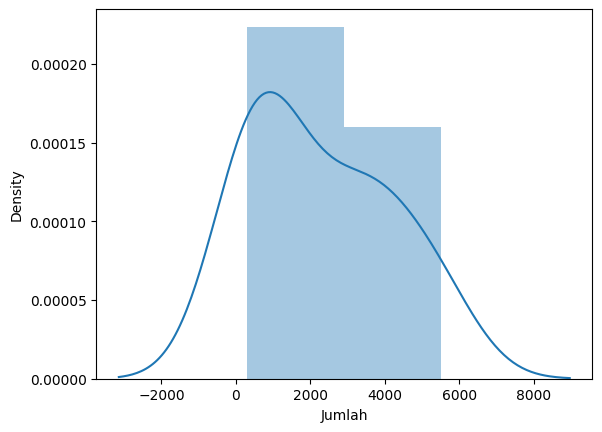

In [78]:
sns.distplot(Twitter2.Jumlah)

In [83]:
twitter_set1

(0        disaat semua cowok berusaha melacak perhatian ...
 1              siapa yang telat ngasih tau elu edan sar...
 2          kadang aku berfikir kenapa aku tetap percaya...
 3            aku itu aku n nku tau matamu sipit tapi di...
 4            kaum cebong kapir udah keliatan dongoknya ...
                                ...                        
 13164      jangan asal ngomong ndasmu congor lu yg seka...
 13165                               kasur mana enak kunyuk
 13166        hati hati bisu g n nlagi bosan huft       xaa
 13167            bom yang real mudah terdeteksi bom yan...
 13168         mana situ ngasih itu cuma foto ya kutil onta
 Name: Tweety, Length: 13044, dtype: object,
 [['Personal', 'Group']])

In [86]:
twitter_set12 = pd.crosstab(twitterr1['Personal'], twitterr1['Tweety'])
print(twitter_set12)

Tweety                                           \
Personal                                          
0                                             1   
1                                             0   

Tweety                                             \
Personal                                            
0                                               3   
1                                               0   

Tweety                                               \
Personal                                              
0                                                 1   
1                                                 0   

Tweety                                                 \
Personal                                                
0                                                   1   
1                                                   1   

Tweety                                                   \
Personal                                                  
0             

In [87]:
twitter_set12.head()

Tweety,,,,,,,ngomong,p,am,itu minta nete sama elu,...,yg paling mirisnya mereka tuh cowo be iga anj anj anj anj anj cowo loh sanggup ya mulutnya ngerumpi terus gbisa diam kaya congor bebek sampe film nya habis anjiiirr kesal ke ubun ubun dah ketahan dlm hati karena pasti ga enak jg ikutan emosi apalag,yg punya balita pasti tau gmn paniknya klo anak n kena ruam asi ruam popok n biang keringat luka berdarah n kejedot bisulan koreng eksim n kesiram air minyak panas n gatal2 npanik kan bunda makanya sedia sll gamat spray mg 1 solusi untuk smua bnd,yg salah itu mengira bahwa cuma isi ajaran agamanya aja yg tokcer yg lain evil contoh simpel ulama kotbah soal kemashlahatan bersama itu sebenarnya kotbah generik mau agamanya apa pasti umumnya setuju soal kepentingan bersama bahkan yg ateis kaya gu,yooa juga cantik banget edan,yuk datang dalam acara launching kajian ekonomi syariah di di jaka a pada hari jumat 20 april 2018 pukul 12 45 14 00 ba da jumatan tema berinvestasi di pasar modal syariah halal atau haram narasumber ustad mahbub ma afi ram,yup negara ini sangat tak pantas dipimpin seorang yg tak faham mengelola negara dgn benar lengserkan jokowi,yusril kelompok islam te indas di era jokowi fakta 2019gantipresiden,zaman now agalanya jelas dan data sdh jelas jika klaimnya benar kasi jika klaimnya tdk benar gak usah repot jangan ganti presiden 2019 ntar jg ketauan makhluk2 yg jago mlintir fakta haizz hidup kog nyari penderitaan kerja woi biar dapur bs n,zaman sby biaya makan sekeluarga dalam sehari cukup rp 50 000 zaman sekarang rp 120 000 sd rp 150 000 baru cukup gaji pns sudah 4 tahun tidak naik kasihan nasib rakyat yg gajinya rata2 dua juta sd 3 juta mumet mereka mungkin mrk berdoa oh lamany,zhang yixing cina disederhanakan tradisional cina pinyin zhang yixing pada tanggal 7 oktober tahun 1991 di changsha hunan cina pada tahun 2008 ia dilemparkan
Personal,,,,,,,,,,,,,,,,,,,,,
0,1,3,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,1,1,1,1
1,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [90]:
# Density Plot
sns.boxplot(data=twitter_set12)

In [84]:
twitter_set2 = (twitterr1['Tweety'],[['Religion', 'Rasis']])

In [85]:
twitter_set2

(0        disaat semua cowok berusaha melacak perhatian ...
 1              siapa yang telat ngasih tau elu edan sar...
 2          kadang aku berfikir kenapa aku tetap percaya...
 3            aku itu aku n nku tau matamu sipit tapi di...
 4            kaum cebong kapir udah keliatan dongoknya ...
                                ...                        
 13164      jangan asal ngomong ndasmu congor lu yg seka...
 13165                               kasur mana enak kunyuk
 13166        hati hati bisu g n nlagi bosan huft       xaa
 13167            bom yang real mudah terdeteksi bom yan...
 13168         mana situ ngasih itu cuma foto ya kutil onta
 Name: Tweety, Length: 13044, dtype: object,
 [['Religion', 'Rasis']])

In [52]:

twitter_set3 = twitterr1[['Abusive', 'Fisik', 'Gender']]

In [62]:
twitter_set3.head()

,Group,Religion,Rasis,Fisik,Gender,Other,Weak,Sedang,Strong,Tweety
0,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian ...
1,0,0,0,0,0,0,0,0,0,siapa yang telat ngasih tau elu edan sar...
2,0,0,0,0,0,0,0,0,0,kadang aku berfikir kenapa aku tetap percaya...
3,0,0,0,0,0,0,0,0,0,aku itu aku n nku tau matamu sipit tapi di...
4,1,1,0,0,0,0,0,1,0,kaum cebong kapir udah keliatan dongoknya ...


<Axes: >

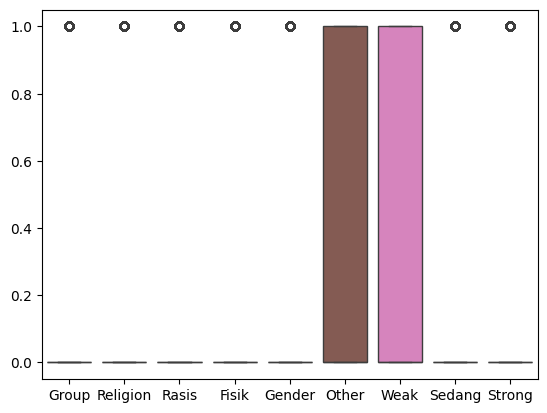

In [63]:
twitter_set3 = twitterr1.drop(['Abusive', 'HS', 'Personal'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=twitter_set3)
# print(stats_df.head())

In [66]:
twitter_set4 = twitterr1[['Weak', 'Sedang', 'Strong']]

In [67]:
twitter_set4

,Weak,Sedang,Strong
0,1,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,1,0
...,...,...,...
13164,1,0,0
13165,0,0,0
13166,0,0,0
13167,0,0,0


<Axes: >

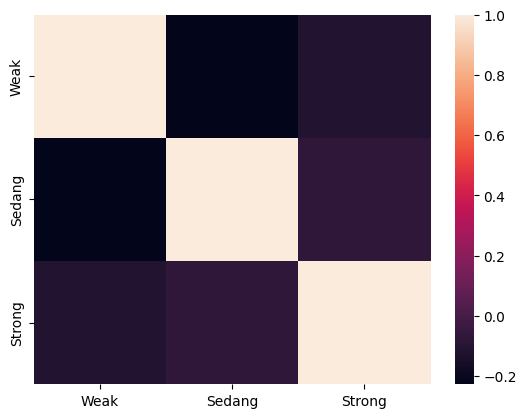

In [68]:
corr = twitter_set4.corr()
 
sns.heatmap(corr)